In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import fileinput
import numpy as np

In [3]:
from collections import Counter
# this loop finds the element in the most cycles in the graph, and removes it until there are
# no more cycles
def remove_from_most_cycles(G):
    nodes_removed = []
    while True:
        breakLoop = True
        cycles = nx.simple_cycles(G)
        cycleList = []
        for l in cycles:
            cycleList.append(l)
            breakLoop=False
        if breakLoop:
            break
        flattened_list = [item for sublist in cycleList for item in sublist]
        counter = Counter(flattened_list)
        most_common_element, count = counter.most_common(1)[0]
        nodes_removed.append(most_common_element)
        G.remove_node(most_common_element)
    return nodes_removed

# finds and returns the node with the highest "closeness centrality"
def get_most_close_node(G):
    nodes = G.nodes
    max_centrality = -1*np.inf
    most_central_node = None
    for n in nodes:
        clos_centr = nx.closeness_centrality(G, n)
        if clos_centr > max_centrality:
            max_centrality = clos_centr
            most_central_node = n
    return most_central_node

# finds and returns the node with the highest "betweenness centrality"
def get_most_between_node(G):
    centralities = nx.betweenness_centrality(G)
    max_value = max(centralities, key=centralities.get)
    return max_value


In [14]:
def generate_output(nodes_removed):
    f = open("output.txt", "w")
    f.write(f"{len(nodes_removed)}\n")
    nodes_rem = [str(x) for x in nodes_removed]
    f.write(" ".join(nodes_rem))

In [10]:
lines = []
fileName = "bighub.txt"
G = nx.DiGraph()
for line in fileinput.input(files=fileName, encoding="utf-8"):
    lines.append(line.replace("\n", "").split(" "))
nodeCnt = int(lines[0][0])
for i in range(nodeCnt):
    G.add_node(i+1)
for i in range(1, nodeCnt+1):
    for start in lines[i][1:]:
        if start != '':
            G.add_edge(int(start), i)

Text(0.5, 1.0, 'Graph before removal is ran')

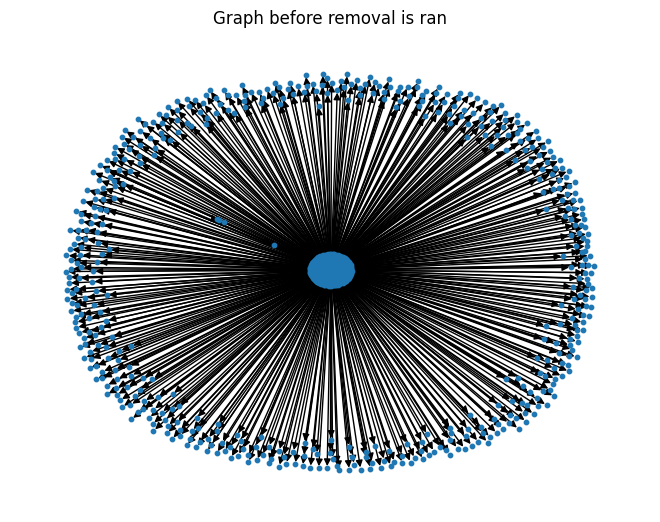

In [6]:
nx.draw(G, node_size=10)
plt.title("Graph before removal is ran")

[502]


Text(0.5, 1.0, 'Graph after removal is ran')

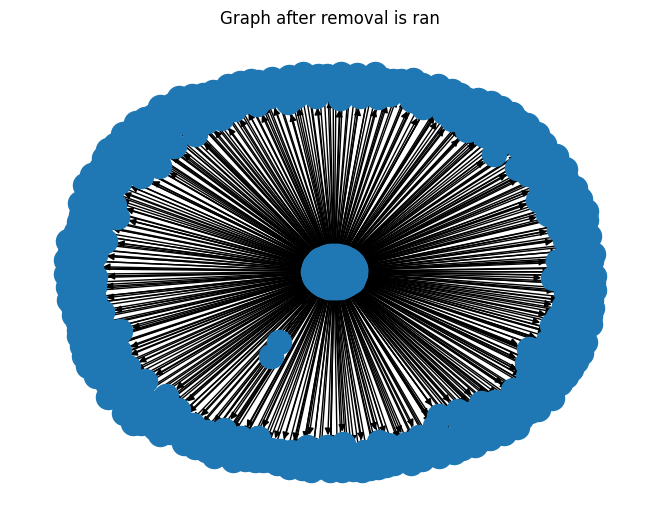

In [11]:
nodes_removed = remove_from_most_cycles(G)
print(nodes_removed)
nx.draw(G)
plt.title("Graph after removal is ran")

In [16]:
generate_output(nodes_removed)

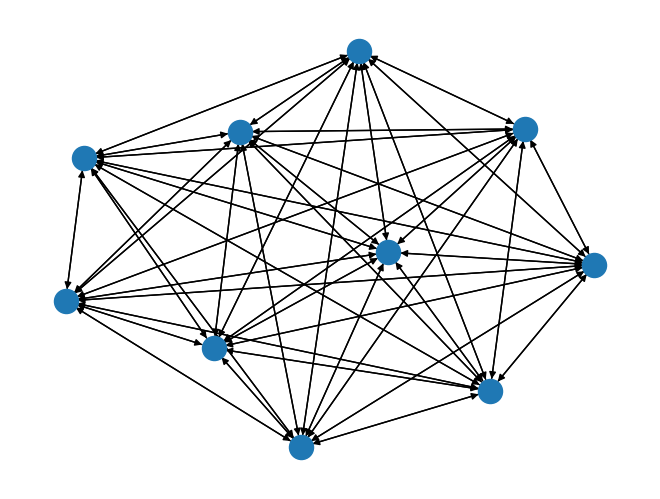

In [8]:
G = nx.complete_graph(10, create_using=nx.DiGraph)
nx.draw(G)


[0, 1, 2, 3, 4, 5, 8, 9, 6]


Text(0.5, 1.0, 'Graph after removal is ran')

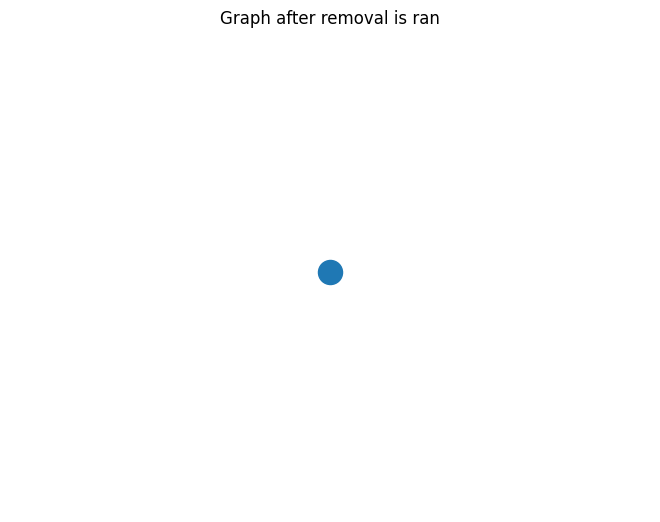

In [9]:
nodes_removed = remove_from_most_cycles(G)
print(nodes_removed)
nx.draw(G)
plt.title("Graph after removal is ran")